In [ ]:
!pip install git+https://github.com/conda-incubator/condacolab.git

import sys
pymaj, pymin = sys.version_info[:2]

# If we're on python 3.7, we're probably using the default colab kernel!
# Otherwise skip this so it doesn't restart the kernel accidentally
if pymin==7:
  import condacolab
  installer_url = r"https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-Linux-x86_64.sh"
  condacolab.install_from_url(installer_url, run_checks=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/conda-incubator/condacolab.git to /tmp/pip-req-build-tnrmpnno
  Running command git clone -q https://github.com/conda-incubator/condacolab.git /tmp/pip-req-build-tnrmpnno
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for condacolab: filename=condacolab-0.1.4-py3-none-any.whl size=7831 sha256=28132c39e38750c9017420103de2ccb2564af1b36ee49e65db8123dbd348bd40
  Stored in directory: /tmp/pip-ephem-wheel-cache-059_z2hw/wheels/d9/69/38/f1ae48e3bcbdf1e6dcf7faa556180210c6d1f1a745e534d8b8
Successfully built condacolab
⏬ Downloading https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-Linux-x86_64.sh...
📌 Adjusting configuration...
📦 Installing...
⏲ Done in 0:02:11
🔁 Restarting kernel...


In [ ]:
!which mamba

/opt/conda/bin/mamba


In [ ]:
! rm /opt/conda/conda-meta/pinned
! mamba install -q -y \
    -c pyg -c pytorch -c conda-forge -c nvidia \
    numba lmdb ase pyyaml tqdm tensorboard pandoc nbsphinx sphinx black wandb \
    lmdb submitit pytest python-lmdb pyg torchvision torchaudio pymatgen sympy \
    'pytorch=1.11'

%cd /content/
!git clone https://github.com/zulissi/ocp.git
%cd /content/ocp
!pip install -e .

rm: cannot remove '/opt/conda/conda-meta/pinned': No such file or directory

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████

  Package                             

In [ ]:
import torch
torch.cuda.is_available()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [ ]:
%%bash
mkdir data
cd data
wget -q http://dl.fbaipublicfiles.com/opencatalystproject/data/tutorial_data.tar.gz -O tutorial_data.tar.gz
tar -xzvf tutorial_data.tar.gz
rm tutorial_data.tar.gz

./
./is2re/
./is2re/train_100/
./is2re/train_100/data.lmdb
./is2re/train_100/data.lmdb-lock
./is2re/val_20/
./is2re/val_20/data.lmdb
./is2re/val_20/data.lmdb-lock
./s2ef/
./s2ef/train_100/
./s2ef/train_100/data.lmdb
./s2ef/train_100/data.lmdb-lock
./s2ef/val_20/
./s2ef/val_20/data.lmdb
./s2ef/val_20/data.lmdb-lock


In [ ]:
# data visualization

import matplotlib
matplotlib.use('Agg')

import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'font.family': ' DejaVu Sans',
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'axes.labelsize': 25,
   'axes.titlesize': 25,
   'text.usetex': False,
   'figure.figsize': [12, 12]
}
matplotlib.rcParams.update(params)


import ase.io
from ase.io.trajectory import Trajectory
from ase.io import extxyz
from ase.calculators.emt import EMT
from ase.build import fcc100, add_adsorbate, molecule
from ase.constraints import FixAtoms
from ase.optimize import LBFGS
from ase.visualize.plot import plot_atoms
from ase import Atoms
from IPython.display import Image

In [ ]:
# this cell sets up and runs a structural relaxation of a propane (C3H8) adsorbate on a copper (Cu) surface

# create a copper (Cu) surface using fcc100
adslab = fcc100("Cu", size=(3, 3, 3))

# create a propane (C3H8) molecule
adsorbate = molecule("C3H8")

# add the propane molecule to the copper surface
add_adsorbate(adslab, adsorbate, 3, offset=(1, 1)) # adslab = adsorbate + slab

# tag all atoms in the slab below the surface as 0, surface atoms as 1, and adsorbate atoms as 2
tags = np.zeros(len(adslab))
tags[18:27] = 1
tags[27:] = 2

# set the tags for all atoms in the system
adslab.set_tags(tags)

# fix all atoms in the slab beneath the surface
cons = FixAtoms(indices=[atom.index for atom in adslab if (atom.tag == 0)])
adslab.set_constraint(cons)

# center the system in the simulation cell and set periodic boundary conditions
adslab.center(vacuum=13.0, axis=2)
adslab.set_pbc(True)

# set the calculator to EMT (the embedded atom method)
adslab.set_calculator(EMT())

# create a directory to store the results of the structural relaxation
os.makedirs('data', exist_ok=True)

# d the optimizer for the structure relaxation as LBFGS, runs for 100 steps or until the maximum force on all atoms (fmax) is below 0 eV/A fmax is typically set to 0.01-0.05 eV/A, for this demo however we run for the full 100 steps
dyn = LBFGS(adslab, trajectory="data/toy_c3h8_relax.traj")
dyn.run(fmax=0, steps=100)

# read the trajectory file and store it as a list of Atoms objects
traj = ase.io.read("data/toy_c3h8_relax.traj", ":")


# create the move_mask array for each Atoms object in the traj list
for atoms in traj:
    move_mask = np.ones(len(atoms), dtype=bool)
    atoms.new_array("move_mask", move_mask)

# convert the trajectory to the extxyz format (used by the OC20 dataset) and write it to a file
columns = (['symbols','positions', 'move_mask', 'tags'])
with open('data/toy_c3h8_relax.extxyz', 'w') as f:
    extxyz.write_xyz(f, traj, columns=columns)

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 18:57:42       15.804700*       6.7764
LBFGS:    1 18:57:42       12.190607*       4.3232
LBFGS:    2 18:57:43       10.240169*       2.2655
LBFGS:    3 18:57:43        9.779223*       0.9372
LBFGS:    4 18:57:43        9.671525*       0.7702
LBFGS:    5 18:57:43        9.574461*       0.6635
LBFGS:    6 18:57:43        9.537502*       0.5718
LBFGS:    7 18:57:43        9.516673*       0.4466
LBFGS:    8 18:57:43        9.481330*       0.4611
LBFGS:    9 18:57:43        9.462255*       0.2931
LBFGS:   10 18:57:43        9.448937*       0.2490
LBFGS:   11 18:57:43        9.433813*       0.2371
LBFGS:   12 18:57:43        9.418884*       0.2602
LBFGS:   13 18:57:43        9.409649*       0.2532
LBFGS:   14 18:57:43        9.404838*       0.1624
LBFGS:   15 18:57:43        9.401753*       0.1823
LBFGS:   16 18:57:43        9.397314*       0.2592
LBFGS:   17 18:57:43        9.3879

/opt/conda/lib/python3.10/site-packages/ase/io/extxyz.py:302: UserWarning: Skipping unhashable information adsorbate_info
  warnings.warn('Skipping unhashable information '


In [ ]:
identifier = "toy_c3h8_relax.extxyz"

# the `index` argument corresponds to what frame of the trajectory to read in, specifiying ":" reads in the full trajectory.
traj = ase.io.read(f"data/{identifier}", index=":")

<AxesSubplot: title={'center': 'final'}>

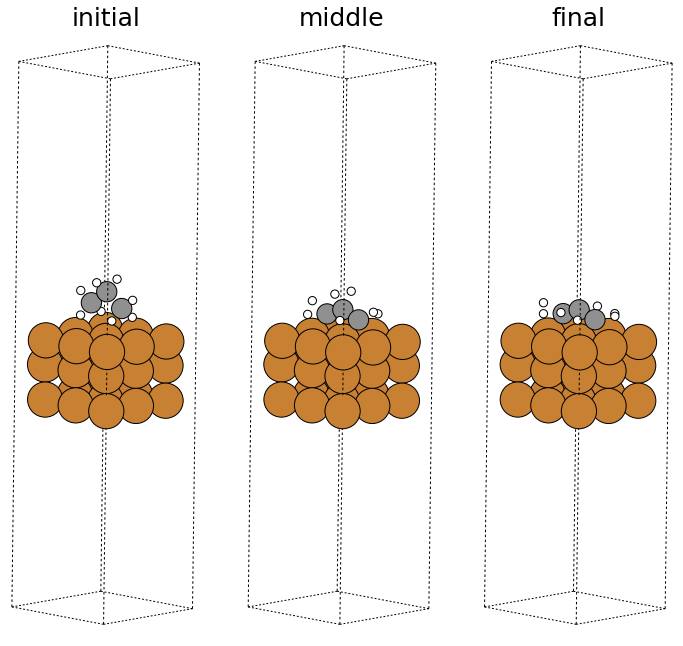

In [ ]:
fig, ax = plt.subplots(1, 3)
labels = ['initial', 'middle', 'final']
for i in range(3):
    ax[i].axis('off')
    ax[i].set_title(labels[i])
ase.visualize.plot.plot_atoms(traj[0], 
                              ax[0], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[50], 
                              ax[1], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[-1], 
                              ax[2], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))

In [ ]:
# next few cells are data contents - including atomic numbers, atomic symbols

i_structure = traj[0]
i_structure

Atoms(symbols='Cu27C3H8', pbc=True, cell=[7.65796644025031, 7.65796644025031, 33.266996999999996], energies=..., forces=..., tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), calculator=SinglePointCalculator(...))

In [ ]:
numbers = i_structure.get_atomic_numbers()
print(numbers)

[29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29  6  6  6  1  1  1  1  1  1  1  1]


In [ ]:
symbols = np.array(i_structure.get_chemical_symbols())
print(symbols)

['Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu'
 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'C' 'C'
 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']


In [ ]:
# unit cell - volume containing system of interest - expressed as a 3x3 array representing the directional vectors that make up the volume

cell = np.array(i_structure.cell)
print(cell)

[[ 7.65796644  0.          0.        ]
 [ 0.          7.65796644  0.        ]
 [ 0.          0.         33.266997  ]]


In [ ]:
# periodic boundary conditions
# represents whether a unit cell repeats in the corresponding directions. 
# OC20 dataset sets this to true, true, true w./ a big vacuum layer above the surface so each unit cell doesn't see itself in the z direction. 

pbc = i_structure.pbc
print(pbc)

[ True  True  True]


<AxesSubplot: title={'center': 'final'}>

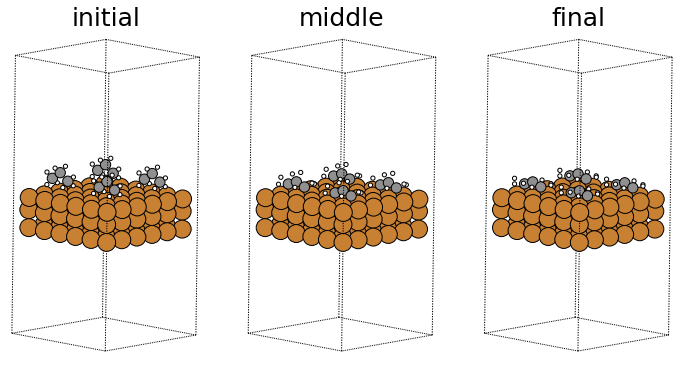

In [ ]:
fig, ax = plt.subplots(1, 3)
labels = ['initial', 'middle', 'final']
for i in range(3):
    ax[i].axis('off')
    ax[i].set_title(labels[i])

ase.visualize.plot.plot_atoms(traj[0].repeat((2,2,1)), 
                              ax[0], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[50].repeat((2,2,1)), 
                              ax[1], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[-1].repeat((2,2,1)), 
                              ax[2], 
                              radii=0.8, 
                              rotation=("-75x, 45y, 10z"))

In [ ]:
# OC20 dataset has systems with different types of atoms
# to help with identifying the index of certain atoms -> tag each atom according to where it is found in the system
# three categories of atoms: sub-surface slab atoms: atoms in the bottom layers of the catalyst - furthest away from the adsorbate, surface slab atoms: these are atoms in the top layers of the catalyst, close to where the adsorbate will be placed, adsorbate atoms - atoms that make up the adsorbate molecule on top of the catalyst
# 0 - subsurface slab atoms

tags = i_structure.get_tags()
print(tags)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2]


In [ ]:
# fixed atoms constraint- surfaces contain more attoms beneathe the surface
# true surface can be approzeimated by fixing the subsurface atoms into their "bulk" location
from ase.constraints import FixAtoms

# define a list of indices of fixed atoms
fixed_atoms_indices = [0, 1, 2]

# create a FixAtoms constraint object
cons = FixAtoms(indices=fixed_atoms_indices)
print(cons, '\n')

# indices of fixed atoms
indices = cons.index
print(indices, '\n')

# fixed atoms correspond to tags = 0
print(tags[indices])

FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# get the final structure from the trajectory
final_structure = traj[-1]

# calculate the potential energy of the relaxed final structure
relaxed_energy = final_structure.get_potential_energy()

# print the relaxed absolute energy
print(f'Relaxed absolute energy = {relaxed_energy} eV')

# create a fcc100 Cu slab with a size of 3x3x3 using EMT calculator
raw_slab = fcc100("Cu", size=(3, 3, 3))
raw_slab.set_calculator(EMT())

# calculate the potential energy of the raw slab
raw_slab_energy = raw_slab.get_potential_energy()

# print the raw slab energy
print(f'Raw slab energy = {raw_slab_energy} eV')

# get the chemical symbols of the adsorbate
adsorbate = Atoms("C3H8").get_chemical_symbols()

# define dictionary of gas reference energies
gas_reference_energies = {'H': .3, 'O': .45, 'C': .35, 'N': .50}

# initialize the adsorbate reference energy
adsorbate_reference_energy = 0

# calculate the adsorbate reference energy
for ads in adsorbate:
    adsorbate_reference_energy += gas_reference_energies[ads]

# print the adsorbate reference energy
print(f'Adsorbate reference energy = {adsorbate_reference_energy} eV\n')

# calculate the adsorption energy
adsorption_energy = relaxed_energy - raw_slab_energy - adsorbate_reference_energy

# print the adsorption energy
print(f'Adsorption energy: {adsorption_energy} eV')


Relaxed absolute energy = 8.358921451407848 eV
Raw slab energy = 8.127167122751231 eV
Adsorbate reference energy = 3.4499999999999993 eV

Adsorption energy: -3.2182456713433822 eV


Text(0, 0.5, 'Energy, eV')

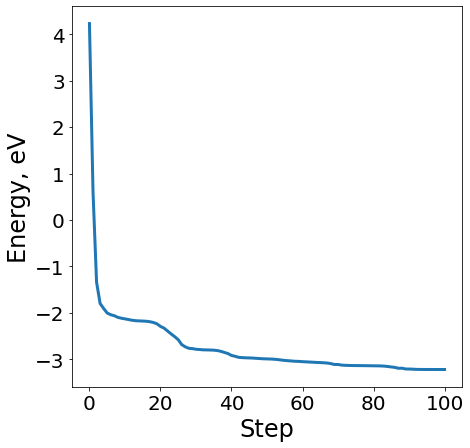

In [ ]:
# energy profile of trajectory - should be a decreasing monotic function - there shouldn't be large spikes because that would indicate problems in optimizatino

energies = [image.get_potential_energy() - raw_slab_energy - adsorbate_reference_energy for image in traj]

plt.figure(figsize=(7, 7))
plt.plot(range(len(energies)), energies, lw=3)
plt.xlabel("Step", fontsize=24)
plt.ylabel("Energy, eV", fontsize=24)

In [ ]:
# returning forces for all atoms - regardless of whether "fixed" or "free"
i_structure.get_forces(apply_constraint=False)

array([[-1.07900000e-05, -3.80000000e-06,  1.13560540e-01],
       [-0.00000000e+00, -4.29200000e-05,  1.13302410e-01],
       [ 1.07900000e-05, -3.80000000e-06,  1.13560540e-01],
       [-1.84600000e-05,  0.00000000e+00,  1.13543430e-01],
       [-0.00000000e+00,  0.00000000e+00,  1.13047800e-01],
       [ 1.84600000e-05,  0.00000000e+00,  1.13543430e-01],
       [-1.07900000e-05,  3.80000000e-06,  1.13560540e-01],
       [-0.00000000e+00,  4.29200000e-05,  1.13302410e-01],
       [ 1.07900000e-05,  3.80000000e-06,  1.13560540e-01],
       [-1.10430500e-02, -2.53094000e-03, -4.84573700e-02],
       [ 1.10430500e-02, -2.53094000e-03, -4.84573700e-02],
       [-0.00000000e+00, -2.20890000e-04, -2.07827000e-03],
       [-1.10430500e-02,  2.53094000e-03, -4.84573700e-02],
       [ 1.10430500e-02,  2.53094000e-03, -4.84573700e-02],
       [-0.00000000e+00,  2.20890000e-04, -2.07827000e-03],
       [-3.49808000e-03, -0.00000000e+00, -7.85544000e-03],
       [ 3.49808000e-03, -0.00000000e+00

In [ ]:
# applying the fixed atoms constraint to the forces
i_structure.get_forces(apply_constraint=True)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.31814437, -0.23642045, -0.39708923],
       [ 0.        , -2.18895316, -2.74768262],
       [ 0.31814437, -0.23642045, -0.397

In [ ]:
from ocpmodels.datasets import TrajectoryLmdbDataset, SinglePointLmdbDataset

# trajectoryLmdbDataset is our custom Dataset method to read the lmdbs as Data objects. Note that we need to give the path to the folder containing lmdbs for S2EF
dataset = TrajectoryLmdbDataset({"src": "data/s2ef/train_100/"})

print("size of the dataset created:", len(dataset))
print(dataset[0])

Size of the dataset created: 100
Data(edge_index=[2, 2964], y=6.282500615000004, pos=[86, 3], cell=[1, 3, 3], atomic_numbers=[86], natoms=86, cell_offsets=[2964, 3], force=[86, 3], fixed=[86], tags=[86], sid=[1], fid=[1], total_frames=74, id='0_0')


/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3326: UserWarning: TrajectoryLmdbDataset is deprecated and will be removed in the future.Please use 'LmdbDataset' instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data = dataset[0]
data

Data(edge_index=[2, 2964], y=6.282500615000004, pos=[86, 3], cell=[1, 3, 3], atomic_numbers=[86], natoms=86, cell_offsets=[2964, 3], force=[86, 3], fixed=[86], tags=[86], sid=[1], fid=[1], total_frames=74, id='0_0')

In [ ]:
energies = torch.tensor([data.y for data in dataset])
energies

tensor([ 6.2825e+00,  4.1290e+00,  3.1451e+00,  3.0260e+00,  1.7921e+00,
         1.6451e+00,  1.2257e+00,  1.2161e+00,  1.0712e+00,  7.4727e-01,
         5.9575e-01,  5.7016e-01,  4.2819e-01,  3.1616e-01,  2.5283e-01,
         2.2425e-01,  2.2346e-01,  2.0530e-01,  1.6090e-01,  1.1807e-01,
         1.1691e-01,  9.1254e-02,  7.4997e-02,  6.3274e-02,  5.2782e-02,
         4.8892e-02,  3.9609e-02,  3.1746e-02,  2.7179e-02,  2.7007e-02,
         2.3709e-02,  1.8005e-02,  1.7676e-02,  1.4129e-02,  1.3162e-02,
         1.1374e-02,  7.4124e-03,  7.7525e-03,  6.1224e-03,  5.2787e-03,
         2.8587e-03,  1.1835e-04, -1.1200e-03, -1.3011e-03, -2.6812e-03,
        -5.9202e-03, -6.1644e-03, -6.9261e-03, -9.1364e-03, -9.2114e-03,
        -1.0665e-02, -1.3760e-02, -1.3588e-02, -1.4895e-02, -1.6190e-02,
        -1.8660e-02, -1.4980e-02, -1.8880e-02, -2.0218e-02, -2.0559e-02,
        -2.1013e-02, -2.2129e-02, -2.2748e-02, -2.3322e-02, -2.3382e-02,
        -2.3865e-02, -2.3973e-02, -2.4196e-02, -2.4

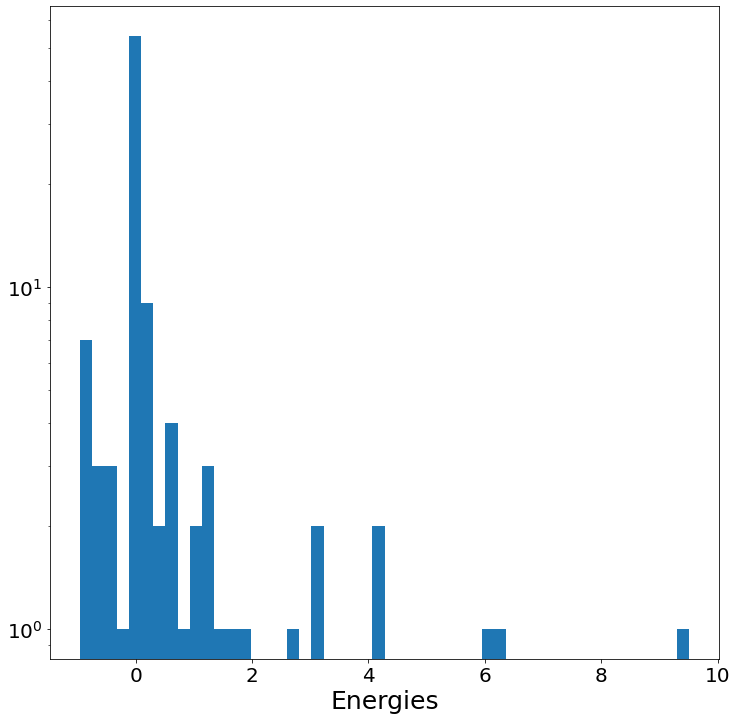

In [ ]:
plt.hist(energies, bins = 50)
plt.yscale("log")
plt.xlabel("Energies")
plt.show()

In [ ]:
# Tasks
# 1. structure to energy and forces
# 2. initial structure to relaxed energy
# 3. initial strucutre to relaxed structure

# S2EF (structure to energy and forces)
# task takes an atomic system as input and predicts the energy of the entire system and forces on each atom, most general task, serving as a surrogate to DFT
# model that can perform well on this task can accelerate other applications like molecular dynamics and transitions tate calculations.
# 1. define or load a configuration (task, model, optimizer, dataset, trainer)
# 2. create a forcestrainer object
# 3. train the model
# 4. validate the model

In [ ]:
# imports 

from ocpmodels.trainers import ForcesTrainer
from ocpmodels.datasets import TrajectoryLmdbDataset
import ocpmodels.models
from ocpmodels.common import logger
from ocpmodels.common.utils import setup_logging
setup_logging()

import numpy as np
import copy
import os

### Dataset

In [ ]:
# dataset
train_src = "data/s2ef/train_100"
val_src = "data/s2ef/val_20"

In [ ]:
# normalize data

train_dataset = TrajectoryLmdbDataset({"src": train_src})

energies = []
for data in train_dataset:
  energies.append(data.y)

mean = np.mean(energies)
stdev = np.std(energies)

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3326: UserWarning: TrajectoryLmdbDataset is deprecated and will be removed in the future.Please use 'LmdbDataset' instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# define config

# task
task = {
    'dataset': 'trajectory_lmdb', # dataset used for the S2EF task
    'description': 'Regressing to energies and forces for DFT trajectories from OCP',
    'type': 'regression',
    'metric': 'mae',
    'labels': ['potential energy'],
    'grad_input': 'atomic forces',
    'train_on_free_atoms': True,
    'eval_on_free_atoms': True
}
# Model
model = {
    'name': 'gemnet_t',
    "num_spherical": 7,
    "num_radial": 128,
    "num_blocks": 3,
    "emb_size_atom": 512,
    "emb_size_edge": 512,
    "emb_size_trip": 64,
    "emb_size_rbf": 16,
    "emb_size_cbf": 16,
    "emb_size_bil_trip": 64,
    "num_before_skip": 1,
    "num_after_skip": 2,
    "num_concat": 1,
    "num_atom": 3,
    "cutoff": 6.0,
    "max_neighbors": 50,
    "rbf": {"name": "gaussian"},
    "envelope": {
      "name": "polynomial",
      "exponent": 5,
    },
    "cbf": {"name": "spherical_harmonics"},
    "extensive": True,
    "otf_graph": False,
    "output_init": "HeOrthogonal",
    "activation": "silu",
    "scale_file": "configs/s2ef/all/gemnet/scaling_factors/gemnet-dT.json",
    "regress_forces": True,
    "direct_forces": True,
}
# Optimizer
optimizer = {
    'batch_size': 1,         # originally 32
    'eval_batch_size': 1,    # originally 32
    'num_workers': 2,
    'lr_initial': 5.e-4,
    'optimizer': 'AdamW',
    'optimizer_params': {"amsgrad": True},
    'scheduler': "ReduceLROnPlateau",
    'mode': "min",
    'factor': 0.8,
    'patience': 3,
    'max_epochs': 1,         # used for demonstration purposes
    'force_coefficient': 100,
    'ema_decay': 0.999,
    'clip_grad_norm': 10,
    'loss_energy': 'mae',
    'loss_force': 'l2mae',
}
# Dataset
dataset = [
  {'src': train_src,
   'normalize_labels': True,
   "target_mean": mean,
   "target_std": stdev,
   "grad_target_mean": 0.0,
   "grad_target_std": stdev
   }, # train set 
  {'src': val_src}, # val set (optional)
]

In [ ]:
trainer = ForcesTrainer(
    task=task,
    model=copy.deepcopy(model), # copied for later use, not necessary in practice.
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    print_every=5,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage),
)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2022-10-31-19-03-28-S2EF-example
  commit: 6e750b2
  identifier: S2EF-example
  logs_dir: ./logs/tensorboard/2022-10-31-19-03-28-S2EF-example
  print_every: 5
  results_dir: ./results/2022-10-31-19-03-28-S2EF-example
  seed: 0
  timestamp_id: 2022-10-31-19-03-28-S2EF-example
dataset:
  grad_target_mean: 0.0
  grad_target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - &id001 !!python/object/apply:numpy.dtype
    args:
    - f8
    - false
    - true
    state: !!python/tuple
    - 3
    - <
    - null
    - null
    - null
    - -1
    - -1
    - 0
  - !!binary |
    dPVlWhRA+D8=
  normalize_labels: true
  src: data/s2ef/train_100
  target_mean: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    zSXlDMrm3D8=
  target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    dPVlWhRA+D8=
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cb

In [ ]:
trainer.model

OCPDataParallel(
  (module): GemNetT(
    (radial_basis): RadialBasis(
      (envelope): PolynomialEnvelope()
      (rbf): GaussianSmearing()
    )
    (cbf_basis3): CircularBasisLayer(
      (radial_basis): RadialBasis(
        (envelope): PolynomialEnvelope()
        (rbf): GaussianSmearing()
      )
    )
    (mlp_rbf3): Dense(
      (linear): Linear(in_features=128, out_features=16, bias=False)
      (_activation): Identity()
    )
    (mlp_cbf3): EfficientInteractionDownProjection()
    (mlp_rbf_h): Dense(
      (linear): Linear(in_features=128, out_features=16, bias=False)
      (_activation): Identity()
    )
    (mlp_rbf_out): Dense(
      (linear): Linear(in_features=128, out_features=16, bias=False)
      (_activation): Identity()
    )
    (atom_emb): AtomEmbedding(
      (embeddings): Embedding(83, 512)
    )
    (edge_emb): EdgeEmbedding(
      (dense): Dense(
        (linear): Linear(in_features=1152, out_features=512, bias=False)
        (_activation): ScaledSiLU(
      

In [ ]:
trainer.train()

/content/ocp/ocpmodels/models/gemnet/gemnet.py:373: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  neighbors_new // 2,
/content/ocp/ocpmodels/models/gemnet/gemnet.py:467: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  block_sizes = neighbors // 2
device 0: 100%|██████████| 20/20 [00:01<00:00, 14.45it/s]


In [ ]:
# validate model
# load the best checkpoint - checkpoint directory has two checkpoint files
# best_checkpoint.pt - model parameters corresponding to the best value during training - used for predictions
# checkpoint.pt - model parameters and optimizer settings for the latest checkpoint. used to continue learning

In [ ]:
# `best_checpoint.pt` file contains the checkpoint with the best val performance
checkpoint_path = os.path.join(trainer.config["cmd"]["checkpoint_dir"], "best_checkpoint.pt")
checkpoint_path

'./checkpoints/2022-10-31-19-03-28-S2EF-example/best_checkpoint.pt'

In [ ]:
# append the dataset with the test set. We use the same val set for demonstration.

# Dataset
dataset.append(
  {'src': val_src}, # test set (optional)
)
dataset

[{'src': 'data/s2ef/train_100',
  'normalize_labels': True,
  'target_mean': 0.45158625849998374,
  'target_std': 1.5156444102461508,
  'grad_target_mean': 0.0,
  'grad_target_std': 1.5156444102461508},
 {'src': 'data/s2ef/val_20'},
 {'src': 'data/s2ef/val_20'}]

In [ ]:
pretrained_trainer = ForcesTrainer(
    task=task,
    model=model,
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-val-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    print_every=10,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage)
)

pretrained_trainer.load_checkpoint(checkpoint_path=checkpoint_path)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2022-10-31-19-03-28-S2EF-val-example
  commit: 6e750b2
  identifier: S2EF-val-example
  logs_dir: ./logs/tensorboard/2022-10-31-19-03-28-S2EF-val-example
  print_every: 10
  results_dir: ./results/2022-10-31-19-03-28-S2EF-val-example
  seed: 0
  timestamp_id: 2022-10-31-19-03-28-S2EF-val-example
dataset:
  grad_target_mean: 0.0
  grad_target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - &id001 !!python/object/apply:numpy.dtype
    args:
    - f8
    - false
    - true
    state: !!python/tuple
    - 3
    - <
    - null
    - null
    - null
    - -1
    - -1
    - 0
  - !!binary |
    dPVlWhRA+D8=
  normalize_labels: true
  src: data/s2ef/train_100
  target_mean: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    zSXlDMrm3D8=
  target_std: !!python/object/apply:numpy.core.multiarray.scalar
  - *id001
  - !!binary |
    dPVlWhRA+D8=
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  

In [ ]:
# make predictions on the existing test_loader
predictions = pretrained_trainer.predict(pretrained_trainer.test_loader, results_file="s2ef_results", disable_tqdm=False)

device 0:   0%|          | 0/20 [00:00<?, ?it/s]/content/ocp/ocpmodels/models/gemnet/gemnet.py:373: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  neighbors_new // 2,
/content/ocp/ocpmodels/models/gemnet/gemnet.py:467: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  block_sizes = neighbors // 2
device 0: 100%|██████████| 20/20 [00:01<00:

In [ ]:
energies = predictions["energy"]
forces = predictions["forces"]

In [ ]:
# Initial Structure to Relaxed Structure (IS2RS) <a name="is2rs"></a>

# using a pre-trained S2EF model to iteratively run a structure optimization to arrive at a relaxed structure
# while the majority of approaches for this task do this iteratively, it's possible to train a model to directly predict relaxed structures.

# Steps for making IS2RS predictions
# 1. Define or load a configuration (config), which includes the following
# 2. Create a ForcesTrainer object
# 3. Train a S2EF model or load an existing S2EF checkpoint
# 4. Run relaxations

#### Imports

In [ ]:
from ocpmodels.trainers import ForcesTrainer
from ocpmodels.datasets import TrajectoryLmdbDataset
from ocpmodels import models
from ocpmodels.common import logger
from ocpmodels.common.utils import setup_logging
setup_logging()

import numpy as np

In [ ]:
train_src = "data/s2ef/train_100"
val_src = "data/s2ef/val_20"
relax_dataset = "data/is2re/val_20/data.lmdb"

In [ ]:
trainer = ForcesTrainer(
    task=task,
    model=model,
    dataset=dataset,
    optimizer=optimizer,
    identifier="is2rs-example",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    print_every=5,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
    amp=True, # use PyTorch Automatic Mixed Precision (faster training and less memory usage)
)

amp: true
cmd:
  checkpoint_dir: ./checkpoints/2022-10-31-19-03-28-is2rs-example
  commit: 6e750b2
  identifier: is2rs-example
  logs_dir: ./logs/tensorboard/2022-10-31-19-03-28-is2rs-example
  print_every: 5
  results_dir: ./results/2022-10-31-19-03-28-is2rs-example
  seed: 0
  timestamp_id: 2022-10-31-19-03-28-is2rs-example
dataset:
  normalize_labels: false
  src: data/s2ef/train_100
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cbf:
    name: spherical_harmonics
  cutoff: 6.0
  direct_forces: true
  emb_size_atom: 512
  emb_size_bil_trip: 64
  emb_size_cbf: 16
  emb_size_edge: 512
  emb_size_rbf: 16
  emb_size_trip: 64
  envelope:
    exponent: 5
    name: polynomial
  extensive: true
  max_neighbors: 50
  num_after_skip: 2
  num_atom: 3
  num_before_skip: 1
  num_blocks: 3
  num_concat: 1
  num_radial: 128
  num_spherical: 7
  otf_graph: false
  output_init: HeOrthogonal
  rbf:
    name: gaussian
  regress_forces: true
  scale_file: configs/s2e

In [ ]:
trainer.load_checkpoint(checkpoint_path=checkpoint_path)

In [ ]:
trainer.run_relaxations()

  0%|          | 0/20 [00:00<?, ?it/s]/content/ocp/ocpmodels/models/gemnet/gemnet.py:373: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  neighbors_new // 2,
/content/ocp/ocpmodels/models/gemnet/gemnet.py:467: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  block_sizes = neighbors // 2
  5%|▌         | 1/20 [00:10<03:19, 10.49s/it]


In [ ]:
import glob
import ase.io
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
import random
import matplotlib

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'font.family': ' DejaVu Sans',
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'axes.labelsize': 25,
   'axes.titlesize': 25,
   'text.usetex': False,
   'figure.figsize': [12, 12]
}
matplotlib.rcParams.update(params)

'ml-relaxations/is2rs-test/1700380.traj'

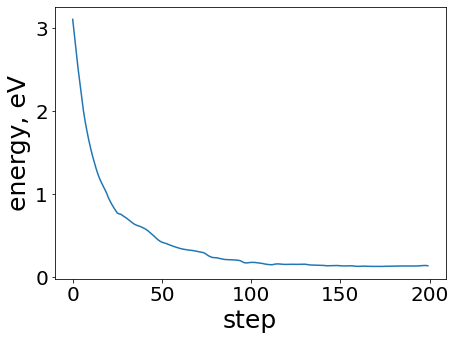

In [ ]:
system = glob.glob("ml-relaxations/is2rs-test/*.traj")[0]
ml_trajectory = ase.io.read(system, ":")

energies = [atom.get_potential_energy() for atom in ml_trajectory]

plt.figure(figsize=(7, 5))
plt.plot(range(len(energies)), energies)
plt.xlabel("step")
plt.ylabel("energy, eV")
system

<AxesSubplot: title={'center': 'ml-final'}>

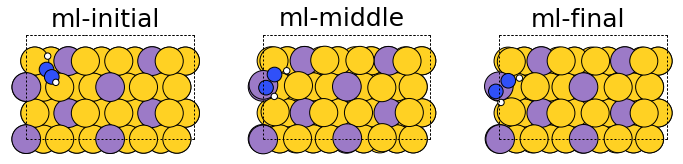

In [ ]:
fig, ax = plt.subplots(1, 3)
labels = ['ml-initial', 'ml-middle', 'ml-final']
for i in range(3):
    ax[i].axis('off')
    ax[i].set_title(labels[i])

ase.visualize.plot.plot_atoms(
    ml_trajectory[0], 
    ax[0], 
    radii=0.8,
    # rotation=("-75x, 45y, 10z")) # uncomment to visualize at different angles
)
ase.visualize.plot.plot_atoms(
    ml_trajectory[100], 
    ax[1], 
    radii=0.8, 
    # rotation=("-75x, 45y, 10z") # uncomment to visualize at different angles
)
ase.visualize.plot.plot_atoms(
    ml_trajectory[-1], 
    ax[2], 
    radii=0.8,
    # rotation=("-75x, 45y, 10z"), # uncomment to visualize at different angles
)


In [ ]:
# goal: develop a simple Graph Neural Network model on the S2EF-200k dataset.
# datset download
%%bash
cd /content/ocp/data
wget -nc -q https://dl.fbaipublicfiles.com/opencatalystproject/data/s2ef_train_200K.tar -O s2ef_train_200K.tar
tar -xvf s2ef_train_200K.tar

s2ef_train_200K/
s2ef_train_200K/README_s2ef_train_200K.md
s2ef_train_200K/s2ef_train_200K/
s2ef_train_200K/s2ef_train_200K/0.extxyz.xz
s2ef_train_200K/s2ef_train_200K/0.txt.xz
s2ef_train_200K/s2ef_train_200K/1.extxyz.xz
s2ef_train_200K/s2ef_train_200K/1.txt.xz
s2ef_train_200K/s2ef_train_200K/2.extxyz.xz
s2ef_train_200K/s2ef_train_200K/2.txt.xz
s2ef_train_200K/s2ef_train_200K/3.extxyz.xz
s2ef_train_200K/s2ef_train_200K/3.txt.xz
s2ef_train_200K/s2ef_train_200K/4.extxyz.xz
s2ef_train_200K/s2ef_train_200K/4.txt.xz
s2ef_train_200K/s2ef_train_200K/5.extxyz.xz
s2ef_train_200K/s2ef_train_200K/5.txt.xz
s2ef_train_200K/s2ef_train_200K/6.extxyz.xz
s2ef_train_200K/s2ef_train_200K/6.txt.xz
s2ef_train_200K/s2ef_train_200K/7.extxyz.xz
s2ef_train_200K/s2ef_train_200K/7.txt.xz
s2ef_train_200K/s2ef_train_200K/8.extxyz.xz
s2ef_train_200K/s2ef_train_200K/8.txt.xz
s2ef_train_200K/s2ef_train_200K/9.extxyz.xz
s2ef_train_200K/s2ef_train_200K/9.txt.xz
s2ef_train_200K/s2ef_train_200K/10.extxyz.xz
s2ef_train_20

In [ ]:
# imports
import torch

from typing import Optional

from ocpmodels.trainers import ForcesTrainer
from ocpmodels import models
from ocpmodels.common import logger
from ocpmodels.common.utils import setup_logging, get_pbc_distances
from ocpmodels.common.registry import registry

from ocpmodels.models.gemnet.layers.radial_basis import PolynomialEnvelope

from torch_geometric.nn.models.schnet import GaussianSmearing
from torch_scatter import scatter

In [ ]:
setup_logging()

# dataset paths
train_src = "data/s2ef/train_100"
val_src = "data/s2ef/val_20"

# configs
task = {
    'dataset': 'trajectory_lmdb', # dataset used for the S2EF task
    'description': 'Regressing to energies and forces for DFT trajectories from OCP',
    'type': 'regression',
    'metric': 'mae',
    'labels': ['potential energy'],
    'grad_input': 'atomic forces',
    'train_on_free_atoms': True,
    'eval_on_free_atoms': True
}

# optimizer
optimizer = {
    'batch_size': 16, # if hitting GPU memory issues, lower this
    'eval_batch_size': 8,
    'num_workers': 8,
    'lr_initial': 0.0001,
    'scheduler': "ReduceLROnPlateau",
    'mode': "min",
    'factor': 0.8,
    'patience': 3,
    'max_epochs': 80,
    'max_epochs': 5,
    'force_coefficient': 100,
}

# dataset
dataset = [
  {'src': train_src, 'normalize_labels': True, 'target_mean':  -0.7554450631141663, 'target_std': 2.887317180633545, 'grad_target_mean': 0.0, 'grad_target_std': 2.887317180633545}, # train set
  {'src': val_src},
]

In [ ]:
class AtomEmbedding(torch.nn.Module):
    def __init__(self, emb_size):
        # initialize the parent class
        super().__init__()

        # create an embedding layer with 83 elements and the specified emb_size
        self.embeddings = torch.nn.Embedding(83, emb_size)  # We go up to Bi (83).

    def forward(self, Z):
        # get the embedding for the input atomic number, Z
        h = self.embeddings(Z - 1)  # -1 because Z.min()=1 (==Hydrogen)
        return h

class EdgeEmbedding(torch.nn.Module):
    def __init__(self, atom_emb_size, edge_emb_size, out_size):
        # initialize the parent class
        super().__init__()

        # calculate the number of input features
        in_features = 2 * atom_emb_size + edge_emb_size

        # create a dense neural network with in_features input size and out_size output size
        # and with a linear layer followed by a SiLU activation function
        self.dense = torch.nn.Sequential(
            torch.nn.Linear(in_features, out_size, bias=False),
            torch.nn.SiLU()
        )

    def forward(self, h, m_rbf, idx_s, idx_t):
        # get the embedding for the source node of each edge
        h_s = h[idx_s]  # indexing source node, shape=(num_edges, emb_size)
        
        # get the embedding for the target node of each edge
        h_t = h[idx_t]  # indexing target node, shape=(num_edges, emb_size)

        # concatenate the embeddings of the source and target nodes, and the edge embeddings (m_rbf)
        m_st = torch.cat([h_s, h_t, m_rbf], dim=-1)  # (num_edges, 2 * atom_emb_size + edge_emb_size)
        
        # pass the concatenated embeddings through the dense neural network
        m_st = self.dense(m_st)  # (num_edges, out_size)
        return m_st

class RadialBasis(torch.nn.Module):
    def __init__(self, num_radial: int, cutoff: float, env_exponent: int = 5):
        # initialize the parent class
        super().__init__()

        # calculate the inverse of the cutoff distance
        self.inv_cutoff = 1 / cutoff
        
        # create a polynomial envelope with the specified exponent
        self.envelope = PolynomialEnvelope(env_exponent)
        
        # create a Gaussian smearing layer with the specified start, stop, and number of Gaussians
        self.rbf = GaussianSmearing(start=0, stop=1, num_gaussians=num_radial)

    def forward(self, d):
        # scale the input distances by the inverse of the cutoff distance


In [ ]:
# message passing - learn more in linked notion

@registry.register_model("simple")
class SimpleAtomEdgeModel(torch.nn.Module):
    def __init__(self, num_atoms, bond_feat_dim, num_targets, emb_size=64, num_radial=64, cutoff=6.0, env_exponent=5):
        super().__init__()

        self.radial_basis = RadialBasis(
            num_radial=num_radial,
            cutoff=cutoff,
            env_exponent=env_exponent,
        )

        self.atom_emb = AtomEmbedding(emb_size)
        self.edge_emb = EdgeEmbedding(emb_size, num_radial, emb_size)

        self.out_energy = torch.nn.Linear(emb_size, 1)
        self.out_forces = torch.nn.Linear(emb_size, 1)

    def forward(self, data):
        batch = data.batch
        atomic_numbers = data.atomic_numbers.long()
        edge_index = data.edge_index
        cell_offsets = data.cell_offsets
        neighbors = data.neighbors

        # computing edges and distances taking periodic boundary conditions into account
        out = get_pbc_distances(
            data.pos,
            edge_index,
            data.cell,
            cell_offsets,
            neighbors,
            return_offsets=True,
            return_distance_vec=True,
        )

        edge_index = out["edge_index"]
        D_st = out["distances"]
        V_st = -out["distance_vec"] / D_st[:, None]

        idx_s, idx_t = edge_index

        # embed atoms
        h_atom = self.atom_emb(atomic_numbers)

        # gaussian expansion of distances D_st
        m_rbf = self.radial_basis(D_st)
        # embed edges
        m = self.edge_emb(h_atom, m_rbf, idx_s, idx_t)

        # read out energy
        # 
        # x_E_i = \sum_j m_ji -- summing up edge features m_ji for all neighbors j
        # of node i to predict node i's energy contribution.
        x_E = scatter(m, idx_t, dim=0, dim_size=h_atom.shape[0], reduce="sum")
        x_E = self.out_energy(x_E)

        # E = \sum_i x_E_i
        num_systems = torch.max(batch)+1
        E = scatter(x_E, batch, dim=0, dim_size=num_systems, reduce="add")
        # (num_systems, 1)

        # read out forces
        # 
        # x_F is the force magnitude per edge, we multiply that by the direction of each edge ji,
        # and sum up all the vectors to predict the resultant force on node i
        x_F = self.out_forces(m)
        F_st_vec = x_F[:, :, None] * V_st[:, None, :]
        F = scatter(F_st_vec, idx_t, dim=0, dim_size=atomic_numbers.size(0), reduce="add")
        # (num_atoms, num_targets, 3)
        F = F.squeeze(1)

        return E, F

    @property
    def num_params(self):
        return sum(p.numel() for p in self.parameters())

In [ ]:
# training 

model_params = {
    'name': 'simple',
    'emb_size': 256,
    'num_radial': 128,
    'cutoff': 6.0,
    'env_exponent': 5,
}

trainer = ForcesTrainer(
    task=task,
    model=model_params,
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-simple",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    print_every=20,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
)

trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


amp: false
cmd:
  checkpoint_dir: ./checkpoints/2022-10-31-19-05-36-S2EF-simple
  commit: 6e750b2
  identifier: S2EF-simple
  logs_dir: ./logs/tensorboard/2022-10-31-19-05-36-S2EF-simple
  print_every: 20
  results_dir: ./results/2022-10-31-19-05-36-S2EF-simple
  seed: 0
  timestamp_id: 2022-10-31-19-05-36-S2EF-simple
dataset:
  grad_target_mean: 0.0
  grad_target_std: 2.887317180633545
  normalize_labels: true
  src: data/s2ef/train_100
  target_mean: -0.7554450631141663
  target_std: 2.887317180633545
gpus: 1
logger: tensorboard
model: simple
model_attributes:
  cutoff: 6.0
  emb_size: 256
  env_exponent: 5
  num_radial: 128
noddp: false
optim:
  batch_size: 16
  eval_batch_size: 8
  factor: 0.8
  force_coefficient: 100
  lr_initial: 0.0001
  max_epochs: 5
  mode: min
  num_workers: 8
  patience: 3
  scheduler: ReduceLROnPlateau
slurm: {}
task:
  dataset: trajectory_lmdb
  description: Regressing to energies and forces for DFT trajectories from OCP
  eval_on_free_atoms: true
  grad_i

device 0: 100%|██████████| 3/3 [00:00<00:00, 10.40it/s]


In [ ]:
# gemnet
model_params = {
    'name': 'gemnet_t',
    'num_spherical': 7,
    'num_radial': 128,
    'num_blocks': 1,
    'emb_size_atom': 256,
    'emb_size_edge': 256,
    'emb_size_trip': 64,
    'emb_size_rbf': 16,
    'emb_size_cbf': 16,
    'emb_size_bil_trip': 64,
    'num_before_skip': 1,
    'num_after_skip': 1,
    'num_concat': 1,
    'num_atom': 3,
    'cutoff': 6.0,
    'max_neighbors': 50,
    'rbf': {'name': 'gaussian'},
    'envelope': {'name': 'polynomial', 'exponent': 5},
    'cbf': {'name': 'spherical_harmonics'},
    'extensive': True,
    'otf_graph': False,
    'output_init': 'HeOrthogonal',
    'activation': 'silu',
    'scale_file': 'configs/s2ef/all/gemnet/scaling_factors/gemnet-dT.json',
    'regress_forces': True,
    'direct_forces': True,
}

trainer = ForcesTrainer(
    task=task,
    model=model_params,
    dataset=dataset,
    optimizer=optimizer,
    identifier="S2EF-gemnet-t",
    run_dir="./", # directory to save results if is_debug=False. Prediction files are saved here so be careful not to override!
    is_debug=False, # if True, do not save checkpoint, logs, or results
    print_every=20,
    seed=0, # random seed to use
    logger="tensorboard", # logger of choice (tensorboard and wandb supported)
    local_rank=0,
)

trainer.train()

amp: false
cmd:
  checkpoint_dir: ./checkpoints/2022-10-31-19-05-36-S2EF-gemnet-t
  commit: 6e750b2
  identifier: S2EF-gemnet-t
  logs_dir: ./logs/tensorboard/2022-10-31-19-05-36-S2EF-gemnet-t
  print_every: 20
  results_dir: ./results/2022-10-31-19-05-36-S2EF-gemnet-t
  seed: 0
  timestamp_id: 2022-10-31-19-05-36-S2EF-gemnet-t
dataset:
  grad_target_mean: 0.0
  grad_target_std: 2.887317180633545
  normalize_labels: true
  src: data/s2ef/train_100
  target_mean: -0.7554450631141663
  target_std: 2.887317180633545
gpus: 1
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cbf:
    name: spherical_harmonics
  cutoff: 6.0
  direct_forces: true
  emb_size_atom: 256
  emb_size_bil_trip: 64
  emb_size_cbf: 16
  emb_size_edge: 256
  emb_size_rbf: 16
  emb_size_trip: 64
  envelope:
    exponent: 5
    name: polynomial
  extensive: true
  max_neighbors: 50
  num_after_skip: 1
  num_atom: 3
  num_before_skip: 1
  num_blocks: 1
  num_concat: 1
  num_radial: 128
  num_spher

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/content/ocp/ocpmodels/models/gemnet/gemnet.py:373: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  neighbors_new // 2,
/content/ocp/ocpmodels/models/gemnet/gemnet.py:467: UserWarning: __floordiv

In [ ]:
!wget -q https://dl.fbaipublicfiles.com/opencatalystproject/models/2021_08/s2ef/gemnet_t_direct_h512_all.pt
checkpoint_path = "/content/ocp/gemnet_t_direct_h512_all.pt"

In [ ]:
from ocpmodels.common.relaxation.ase_utils import OCPCalculator
import ase.io
from ase.optimize import BFGS
from ase.build import fcc100, add_adsorbate, molecule
import os
from ase.constraints import FixAtoms

# construct a sample structure
adslab = fcc100("Cu", size=(3, 3, 3))
adsorbate = molecule("C3H8")
add_adsorbate(adslab, adsorbate, 3, offset=(1, 1))
tags = np.zeros(len(adslab))
tags[18:27] = 1
tags[27:] = 2
adslab.set_tags(tags)
cons= FixAtoms(indices=[atom.index for atom in adslab if (atom.tag == 0)])
adslab.set_constraint(cons)
adslab.center(vacuum=13.0, axis=2)
adslab.set_pbc(True)

# define the calculator
calc = OCPCalculator(checkpoint=checkpoint_path)

# Set up the calculator
adslab.calc = calc

os.makedirs("data/sample_ml_relax", exist_ok=True)
opt = BFGS(adslab, trajectory="data/sample_ml_relax/toy_c3h8_relax.traj")

opt.run(fmax=0.05, steps=100)

amp: false
cmd:
  checkpoint_dir: /content/ocp/checkpoints/2022-10-31-19-05-36
  commit: 6e750b2
  identifier: ''
  logs_dir: /content/ocp/logs/tensorboard/2022-10-31-19-05-36
  print_every: 100
  results_dir: /content/ocp/results/2022-10-31-19-05-36
  seed: null
  timestamp_id: 2022-10-31-19-05-36
dataset: null
gpus: 0
logger: tensorboard
model: gemnet_t
model_attributes:
  activation: silu
  cbf:
    name: spherical_harmonics
  cutoff: 6.0
  direct_forces: true
  emb_size_atom: 512
  emb_size_bil_trip: 64
  emb_size_cbf: 16
  emb_size_edge: 512
  emb_size_rbf: 16
  emb_size_trip: 64
  envelope:
    exponent: 5
    name: polynomial
  extensive: true
  max_neighbors: 50
  num_after_skip: 2
  num_atom: 3
  num_before_skip: 1
  num_blocks: 3
  num_concat: 1
  num_radial: 128
  num_spherical: 7
  otf_graph: true
  output_init: HeOrthogonal
  rbf:
    name: gaussian
  regress_forces: true
noddp: false
optim:
  batch_size: 32
  clip_grad_norm: 10
  ema_decay: 0.999
  energy_coefficient: 1
 

/content/ocp/ocpmodels/preprocessing/atoms_to_graphs.py:139: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755888698/work/torch/csrc/utils/tensor_new.cpp:210.)
  cell = torch.Tensor(atoms.get_cell()).view(1, 3, 3)
/content/ocp/ocpmodels/models/gemnet/gemnet.py:373: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  neighbors_new // 2,
/content/ocp/ocpmodels/models/gemnet/gemnet.py:467: UserWarning: __floordiv__ is deprecated, and its behavior will change in a futu

      Step     Time          Energy         fmax
BFGS:    0 19:06:20       -4.099784        1.5675
BFGS:    1 19:06:22       -4.244461        1.1370
BFGS:    2 19:06:23       -4.403120        0.7635
BFGS:    3 19:06:25       -4.503653        0.8364
BFGS:    4 19:06:26       -4.558208        0.7339
BFGS:    5 19:06:28       -4.592069        0.4095
BFGS:    6 19:06:29       -4.619362        0.7312
BFGS:    7 19:06:30       -4.671468        0.9712
BFGS:    8 19:06:32       -4.796430        0.9211
BFGS:    9 19:06:33       -4.957961        0.9762
BFGS:   10 19:06:35       -5.109433        1.0384
BFGS:   11 19:06:36       -5.295604        1.2247
BFGS:   12 19:06:37       -5.498977        1.1271
BFGS:   13 19:06:39       -5.618095        1.0669
BFGS:   14 19:06:40       -5.737120        0.9509
BFGS:   15 19:06:41       -5.901926        0.9260
BFGS:   16 19:06:43       -6.076125        1.2738
BFGS:   17 19:06:44       -6.198373        1.2029
BFGS:   18 19:06:45       -6.250323        0.6851
B

True